# Distinguish Your Own Digits (DYOD)

You are going to write a classifier that distinguishes between the number 3 and number 8.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

From the command line run `pip install mnist`. This is a library that will help you bring down the mnist dataset. If you run this from a notebook, you need to put  `!pip install mnist` in a cell by itself.

In [3]:
!pip install mnist

## Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


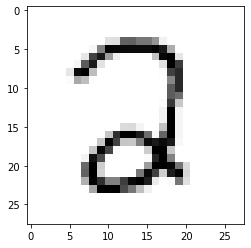

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

In [15]:
#Impoting functions from 'Kudzu'
from kudzu.model import Model
from kudzu.train import Learner
from kudzu.optim import GD
from kudzu.data import Data, Sampler,Dataloader

from kudzu.callbacks import AccCallback
from kudzu.callbacks import ClfCallback

from kudzu.loss import MSE

from kudzu.layer import Sigmoid,Relu
from kudzu.layer import Affine

### Let us create a `Config` class, to store important parameters. 
This class essentially plays the role of a dictionary.

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

### Running Models with the Training data
Details about the network layers:
- A first affine layer has 784 inputs and does 100 affine transforms. These are followed by a Relu
- A second affine layer has 100 inputs from the 100 activations of the past layer, and does 100 affine transforms. These are followed by a Relu
- A third affine layer has 100 activations and does 2 affine transformations to create an embedding for visualization. There is no non-linearity here.
- A final "logistic regression" which has an affine transform from 2 inputs to 1 output, which is squeezed through a sigmoid.


In [17]:
data = Data(X_train, y_train.reshape(-1,1))
sampler = Sampler(data, config.bs, shuffle=True)

dl = Dataloader(data, sampler)

opt = GD(config.lr)
loss = MSE()

In [18]:
training_data_x = X_train
testing_data_x = X_test
training_data_y = y_train.reshape(-1,1)
testing_data_y = y_test.reshape(-1,1)

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("last", 2, 1), Sigmoid("last")]
model_nn = Model(layers)
model_lr = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

xavier
xavier
xavier
xavier
xavier


In [20]:
nn_learner = Learner(loss, model_nn, opt, config.num_epochs)
acc_nn = ClfCallback(nn_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
nn_learner.set_callbacks([acc_nn])

In [21]:
lr_learner = Learner(loss, model_lr, opt, config.num_epochs)
acc_lr = ClfCallback(lr_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
lr_learner.set_callbacks([acc_lr])

In [22]:
nn_learner.train_loop(dl)

Epoch 0, Loss 0.2433
Training Accuracy: 0.6193, Testing Accuracy: 0.6462



Epoch 10, Loss 0.102
Training Accuracy: 0.9200, Testing Accuracy: 0.9239



Epoch 20, Loss 0.0595
Training Accuracy: 0.9400, Testing Accuracy: 0.9526



Epoch 30, Loss 0.046
Training Accuracy: 0.9498, Testing Accuracy: 0.9607



Epoch 40, Loss 0.0397
Training Accuracy: 0.9544, Testing Accuracy: 0.9657



Epoch 50, Loss 0.0359
Training Accuracy: 0.9587, Testing Accuracy: 0.9662



Epoch 60, Loss 0.0334
Training Accuracy: 0.9613, Testing Accuracy: 0.9682



Epoch 70, Loss 0.0315
Training Accuracy: 0.9629, Testing Accuracy: 0.9708



Epoch 80, Loss 0.03
Training Accuracy: 0.9644, Testing Accuracy: 0.9703



Epoch 90, Loss 0.0287
Training Accuracy: 0.9668, Testing Accuracy: 0.9703



Epoch 100, Loss 0.0277
Training Accuracy: 0.9678, Testing Accuracy: 0.9693



Epoch 110, Loss 0.0267
Training Accuracy: 0.9691, Testing Accuracy: 0.9703



Epoch 120, Loss 0.0259
Training Accuracy: 0.9701, Testing Accuracy: 0.9708



Epoch 130, Loss 0.0252
Training Accuracy: 0.9713, Testing Accuracy: 0.9713



Epoch 140, Loss 0.0245
Training Accuracy: 0.9719, Testing Accuracy: 0.9713



Epoch 150, Loss 0.0239
Training Accuracy: 0.9727, Testing Accuracy: 0.9703



Epoch 160, Loss 0.0233
Training Accuracy: 0.9735, Testing Accuracy: 0.9708



Epoch 170, Loss 0.0228
Training Accuracy: 0.9738, Testing Accuracy: 0.9703



Epoch 180, Loss 0.0223
Training Accuracy: 0.9745, Testing Accuracy: 0.9713



Epoch 190, Loss 0.0218
Training Accuracy: 0.9755, Testing Accuracy: 0.9718



Epoch 200, Loss 0.0213
Training Accuracy: 0.9760, Testing Accuracy: 0.9723



Epoch 210, Loss 0.0209
Training Accuracy: 0.9768, Testing Accuracy: 0.9728



Epoch 220, Loss 0.0205
Training Accuracy: 0.9772, Testing Accuracy: 0.9723



Epoch 230, Loss 0.0201
Training Accuracy: 0.9776, Testing Accuracy: 0.9728



Epoch 240, Loss 0.0197
Training Accuracy: 0.9781, Testing Accuracy: 0.9738



0.03573906825085587

In [23]:
lr_learner.train_loop(dl)

Epoch 0, Loss 0.2384
Training Accuracy: 0.7041, Testing Accuracy: 0.7182



Epoch 10, Loss 0.1019
Training Accuracy: 0.9120, Testing Accuracy: 0.9264



Epoch 20, Loss 0.0784
Training Accuracy: 0.9296, Testing Accuracy: 0.9451



Epoch 30, Loss 0.0678
Training Accuracy: 0.9374, Testing Accuracy: 0.9516



Epoch 40, Loss 0.0614
Training Accuracy: 0.9427, Testing Accuracy: 0.9567



Epoch 50, Loss 0.057
Training Accuracy: 0.9463, Testing Accuracy: 0.9572



Epoch 60, Loss 0.0538
Training Accuracy: 0.9473, Testing Accuracy: 0.9582



Epoch 70, Loss 0.0513
Training Accuracy: 0.9502, Testing Accuracy: 0.9607



Epoch 80, Loss 0.0493
Training Accuracy: 0.9520, Testing Accuracy: 0.9617



Epoch 90, Loss 0.0477
Training Accuracy: 0.9533, Testing Accuracy: 0.9617



Epoch 100, Loss 0.0463
Training Accuracy: 0.9540, Testing Accuracy: 0.9632



Epoch 110, Loss 0.045
Training Accuracy: 0.9549, Testing Accuracy: 0.9627



Epoch 120, Loss 0.044
Training Accuracy: 0.9553, Testing Accuracy: 0.9632



Epoch 130, Loss 0.0431
Training Accuracy: 0.9567, Testing Accuracy: 0.9652



Epoch 140, Loss 0.0422
Training Accuracy: 0.9577, Testing Accuracy: 0.9652



Epoch 150, Loss 0.0415
Training Accuracy: 0.9584, Testing Accuracy: 0.9652



Epoch 160, Loss 0.0408
Training Accuracy: 0.9585, Testing Accuracy: 0.9657



Epoch 170, Loss 0.0402
Training Accuracy: 0.9589, Testing Accuracy: 0.9657



Epoch 180, Loss 0.0396
Training Accuracy: 0.9594, Testing Accuracy: 0.9657



Epoch 190, Loss 0.0391
Training Accuracy: 0.9599, Testing Accuracy: 0.9657



Epoch 200, Loss 0.0386
Training Accuracy: 0.9602, Testing Accuracy: 0.9662



Epoch 210, Loss 0.0382
Training Accuracy: 0.9605, Testing Accuracy: 0.9667



Epoch 220, Loss 0.0378
Training Accuracy: 0.9608, Testing Accuracy: 0.9672



Epoch 230, Loss 0.0374
Training Accuracy: 0.9609, Testing Accuracy: 0.9677



Epoch 240, Loss 0.037
Training Accuracy: 0.9614, Testing Accuracy: 0.9672



0.006629068916724722

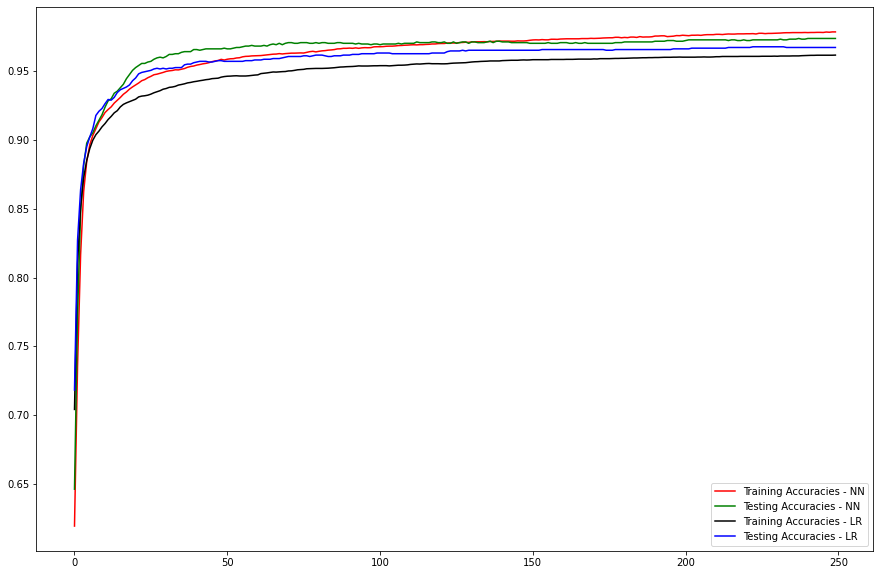

In [24]:
#comparing the results of NN and LR
plt.figure(figsize=(15,10))

# Neural Network plots
plt.plot(acc_nn.accuracies, 'r-', label = "Training Accuracies - NN")
plt.plot(acc_nn.test_accuracies, 'g-', label = "Testing Accuracies - NN")

# Logistic Regression plots
plt.plot(acc_lr.accuracies, 'k-', label = "Training Accuracies - LR")
plt.plot(acc_lr.test_accuracies, 'b-', label = "Testing Accuracies - LR")
plt.legend()

#### Plotting the outputs of this layer of the NN.


In [25]:
new_model = Model(layers[:-2])
testing_plot = new_model(testing_data_x)

Text(0.5, 1.0, 'Outputs')

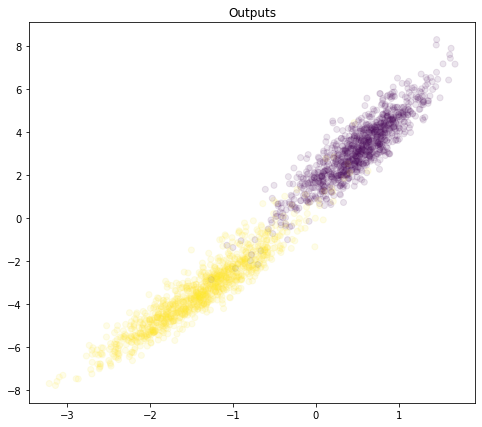

In [26]:
# Plotting the scatter plot of points and color coding by class
plt.figure(figsize=(8,7))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel());
plt.title('Outputs')

Probability contours

In [27]:
model_prob = Model(layers[-2:]) 

In [28]:
#creating the x and y ranges according to the above generated plot.
x_range = np.linspace(-4, 1, 100) 
y_range = np.linspace(-6, 6, 100) 
x_grid, y_grid = np.meshgrid(x_range, y_range) # x_grid and y_grig are of size 100 X 100

# converting x_grid and y_grid to continuous arrays
x_gridflat = np.ravel(x_grid)
y_gridflat = np.ravel(y_grid)

# The last layer of the current model takes two columns as input. Hence transpose of np.vstack() is required.
X = np.vstack((x_gridflat, y_gridflat)).T

prob_contour = model_prob(X).reshape(100,100) 

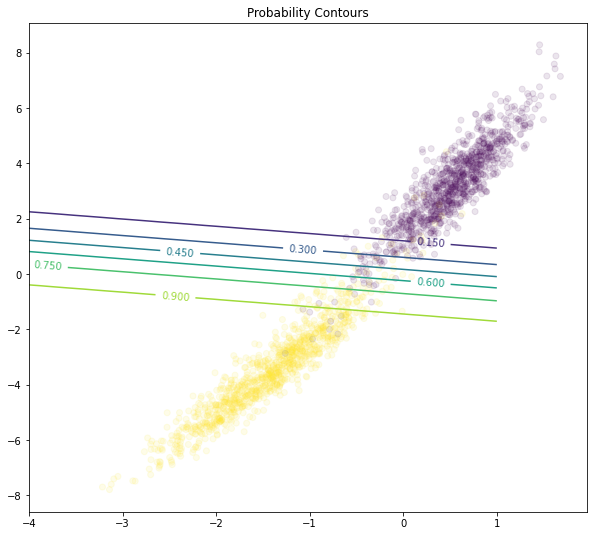

In [29]:
plt.figure(figsize=(10,9))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(x_grid,y_grid,prob_contour)
plt.title('Probability Contours')
plt.clabel(contours, inline = True );